In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
x1=np.array([[2,1],[3,4],[5,0],[7,6],[9,2]])
mean=np.mean(x1, axis=0)
covmat=np.cov(x1,rowvar=False)
covmat
x2=np.subtract(x1,mean)
x2

array([[-3.2, -1.6],
       [-2.2,  1.4],
       [-0.2, -2.6],
       [ 1.8,  3.4],
       [ 3.8, -0.6]])

In [21]:
from numpy.linalg import eig
eigval,eigvector=np.linalg.eig(covmat)
print(eigval)
print(eigvector)

[9. 5.]
[[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]


In [37]:
mul=np.matmul(x2,eigvector)
mul
mat=np.around(mul, decimals=3)
print(mat)

[[-3.578 -0.   ]
 [-1.342  2.236]
 [-1.342 -2.236]
 [ 3.13   2.236]
 [ 3.13  -2.236]]


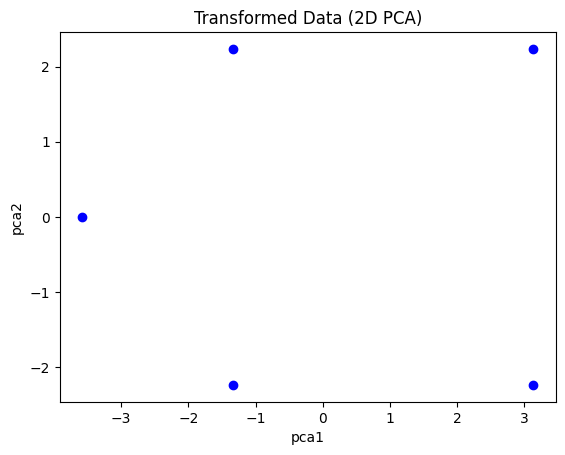

In [40]:
plt.scatter(mat[:, 0], mat[:, 1], color='blue')
plt.title('Transformed Data (2D PCA)')
plt.xlabel("pca1")
plt.ylabel("pca2")
plt.show()

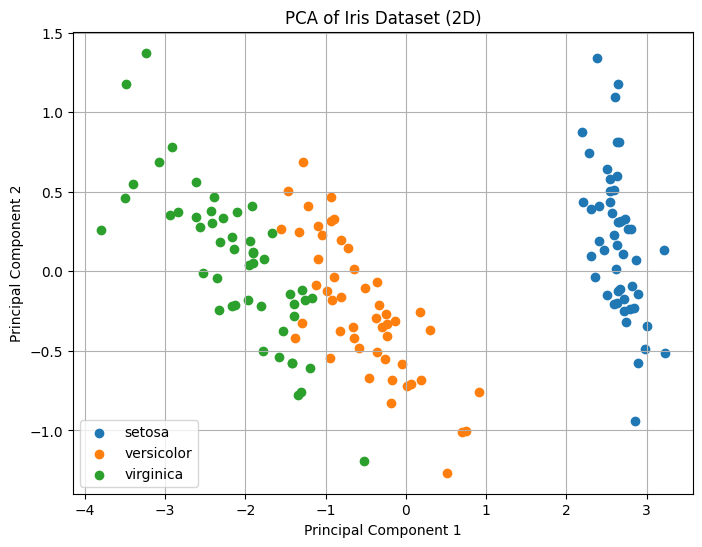

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

def pca(X, n_components):
    mean = np.mean(X, axis=0)
    X_centered = X - mean
    cov_matrix = np.cov(X_centered, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    idx = np.argsort(eigenvalues)[::-1]
    eigenvectors = eigenvectors[:, idx]
    components = eigenvectors[:, :n_components]
    X_transformed = np.dot(X_centered, components)
    return X_transformed
iris = load_iris()
X = iris.data
y = iris.target
X_transformed = pca(X, n_components=2)

plt.figure(figsize=(8, 6))
for target in np.unique(y):
    plt.scatter(X_transformed[y == target, 0], X_transformed[y == target, 1], label=iris.target_names[target])
plt.title('PCA of Iris Dataset (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()
